- Show VODCA data
    - Visualise an image
- Show C3S SM data reading
    - Visualise an image (with date selection widget)
    - Visualise a time series (with location selection)
    - Calculate drought indices
    

In [7]:
import numpy as np
import pandas as pd
import xarray as xr
import ipywidgets as widgets
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import utils as utils

# %matplotlib widget
%matplotlib inline


# About the Data
- What is C3S SM
- What are the main characteristics
- Where is it provided
- What are potential applications
- Why should you use it

## Visualise monthly images

In [8]:
c3s = xr.open_dataset('./LTC_DATA/STACK_C3S-SOILMOISTURE_v202012_COMBINED_MONTHLY.nc')

In [9]:
slider=widgets.SelectionSlider(
    options=[str(d.date()) for d in pd.to_datetime(c3s['time'])],
    value='2022-09-01', description='Select a date:', continuous_update=False,
)
# dropdown = widgets.Select(options=['Soil Moisture', 'Soil Moisture Anomaly'],rows=2)
@widgets.interact(dt=slider)
def plot_soil_moisture(dt):
    """
    Select and visualise C3S SM data at a given time
    """
    img = c3s.sel(time=dt)['sm']
    p = img.plot(
        transform=ccrs.PlateCarree(),
        figsize=(12,5), cmap=utils.cm_sm,
        vmin=0, vmax=0.5,
        subplot_kws={
            "projection": ccrs.PlateCarree(),
        })
    p.axes.add_feature(cartopy.feature.LAND, zorder=0, facecolor='gray')
    p.axes.coastlines()

interactive(children=(SelectionSlider(continuous_update=False, description='Select a date:', index=526, option…

# Extract a time series

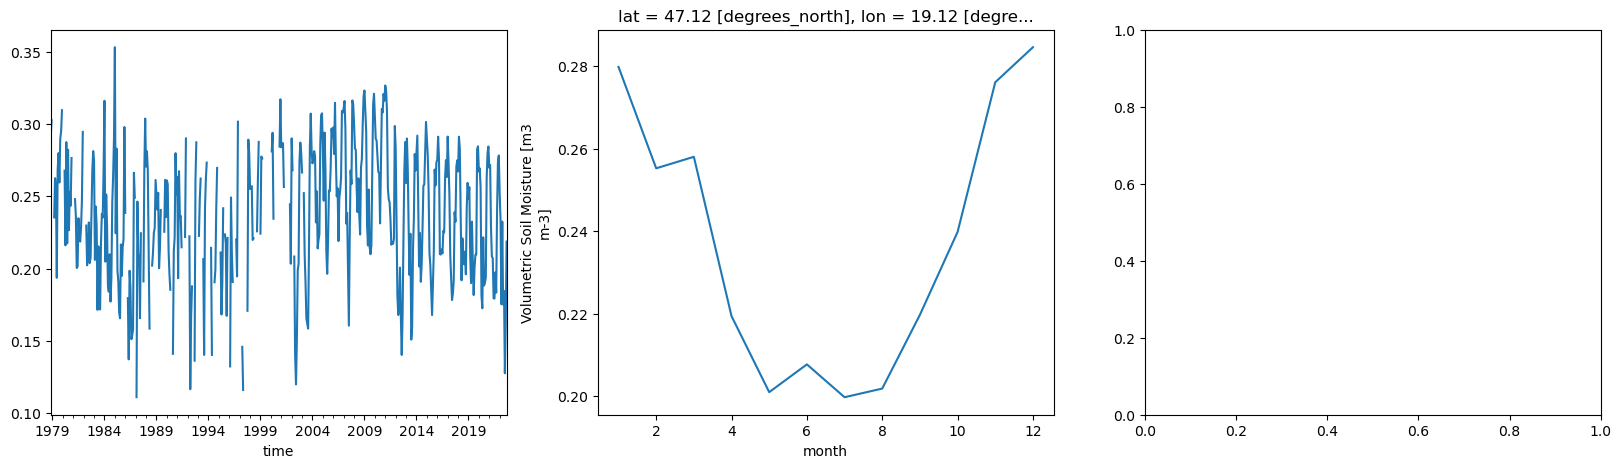

In [27]:
def extract_anoamly(lon=19, lat=47):
    fig, axs = plt.subplots(1, 3, figsize=(20,5))
    ts = c3s.sel(lon=lon, lat=lat, method='nearest')['sm'].to_pandas()
    clim = ts.groupby('time.month').mean()
    ts.to_pandas().plot(ax=axs[0])
    clim.plot(ax=axs[1])
    


extract_anoamly()